# DSML Advanced : Imbalance data


## Content
- kNN Code Implementation using Breast Cancer Case Study
- What is imbalanced data?
- Imbalance data with KNN
  - Why Accuracy not used as metrics in Imbalance data
  - Alternative Metrics
  
- Imbalance data with Log-reg
- Handling Imbalance Data  
    - weighted loss
        - Implementation of Churn Prediction using weighted loss

    - Oversampling
    - Undersampling

-   SMOTE (Synthetically Minority Oversampling Technique) (1:29:00-1:43:20)
- Implementation of Churn Prediction using SMOTE


# **Code Implementation using Breast Cancer Case Study**

Lets now start with the implementation of KNN on  **Breast Cancer** dataset

- We know how critical it is to identify the type of Cancer for the Patient recovery

- there are mainly two Cancer Types: Benign, Malignant

- Malignant Cancer type: 
    - These are the threatening Cancer type since they grow quickly and uncontrollably 
    - And can continue to grow and spread, till it becomes life threatening. 
    - Malignant tumors can also spread to other parts of the body 

- Benign Cancer Types:
    - These are a less Threatening ones, since they stay in their primary location without spreading to other sites of the body. 
    - Benign tumors tend to grow slowly.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split 

Data loading

In [ ]:
! gdown 1fuy-OXsvGPm3Tv4s9x3gw1WBBS6KopU1

Downloading...
From: https://drive.google.com/uc?id=1fuy-OXsvGPm3Tv4s9x3gw1WBBS6KopU1
To: /content/breast-cancer.csv
100% 125k/125k [00:00<00:00, 41.8MB/s]


In [ ]:
data = pd.read_csv('breast-cancer.csv')

data.shape

(569, 33)

Dataset has different features regarding the size of cancer tumor. 


In [ ]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

- Notice Along with all the features, we have an unusual feature ```'Unnamed: 32'``` 

#### How can we check if feature ```'Unnamed: 32'``` can be an error feature ?  

- By checking the ```nan``` in the dataset and if all the rows of that feature has ```nan``` then we can discard it 

In [ ]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
data=data.drop(["Unnamed: 32","id"],axis=1)

Converting our Cancer type Categorical data to Numeric 

In [ ]:
data["diagnosis"] = data["diagnosis"].map({'B':0,'M':1}).astype(int)
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

defining X and Y of our data

In [ ]:
x=data.drop(['diagnosis'],axis=1)
y=data[['diagnosis']]

In [ ]:
x.shape, y.shape

((569, 30), (569, 1))

- Now since there are 30 features, and we know the Test Time Complexity and Space Complexity is quite High in KNN,



Train, Validation, Test Split

In [ ]:
X_tcv, X_test, y_tcv, y_test = train_test_split(x,y,test_size=0.33, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_tcv, y_tcv,test_size=0.33, random_state=42)

In [ ]:
print(f'Training data: {X_train.shape}, {y_train.shape}')
print(f'Validation data:{X_val.shape}, {y_val.shape}')
print(f'Test data:{X_test.shape}, {y_test.shape}')

Training data: (255, 30), (255, 1)
Validation data:(126, 30), (126, 1)
Test data:(188, 30), (188, 1)


 Lets do Dimensionality Reduction, by performing PCA

In [ ]:
from sklearn.decomposition import PCA
# reducing 30 features to just 2 features
pca = PCA(n_components=2)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)


In [ ]:
X_train.shape,X_val.shape,X_test.shape

((255, 2), (126, 2), (188, 2))

Visualizing the data on these 2 features on training data

In [ ]:
df = pd.DataFrame(X_train, columns=['f1', 'f2'])
df['y'] = np.asarray(y_train)



df.head()

f1          f2  y
0   20.635334  -31.660314  1
1 -468.593533  -20.893730  1
2 -677.760021    0.466454  0
3   12.897913   63.091361  1
4  920.444673  132.696130  1

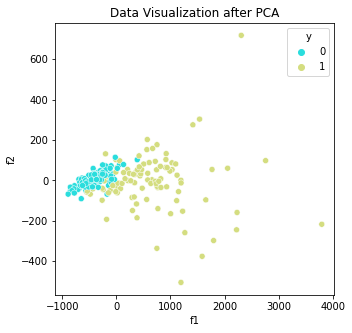

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Data Visualization after PCA')
sns.scatterplot(data=df, x='f1', y='f2', hue='y', palette='rainbow')
plt.show()

Lets do the same visualization for validation data

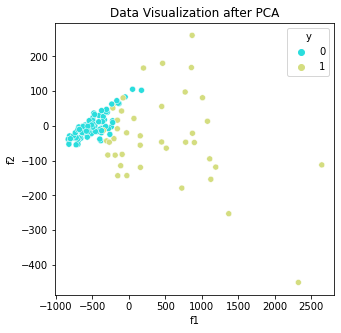

In [ ]:
df = pd.DataFrame(X_val, columns=['f1', 'f2'])
df['y'] = np.asarray(y_val)




plt.figure(figsize=(5,5))
plt.title('Data Visualization after PCA')
sns.scatterplot(data=df, x='f1', y='f2', hue='y', palette='rainbow')
plt.show()

- We can clearly see how, our PCA features divides data into the two distinct parts
- Showing how these two features to be enough to distinguish between Benign ($y=0$) and Malignant ($y=1$)

[KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) using Sklearn 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Calculating  $K_{best}$
- with k values ranging: $1 \le k \le 50$

Note: Error defined as 1-accuracy

In [ ]:
error = []
y_val = y_val.values.squeeze()
y_train = y_train.values.squeeze()
# Calculating error for K values between 1 and 50
# Note: 51 is not included in the loop 
for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    error.append(np.mean(pred_i != y_val))

In [ ]:
len(error)

50

Visualizing the error and K values

Text(0, 0.5, 'Mean Error')

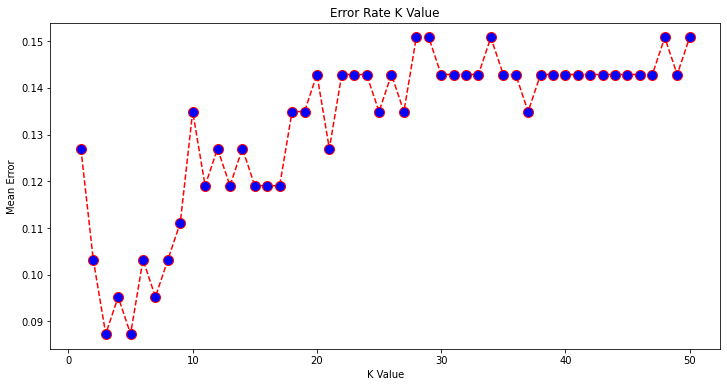

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 51), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

- Noticing that the first K value where Mean error is lowest is at K = 3,
- Hence $K_{best} = 3$

Note: The finding of $K_{best}$ was done on Validation Data

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')

knn.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

Accuracy of KNN on Test data

In [ ]:
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.9414893617021277

Precision, Recall, F1-Score of KNN on test data 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       121
           1       0.94      0.90      0.92        67

    accuracy                           0.94       188
   macro avg       0.94      0.93      0.94       188
weighted avg       0.94      0.94      0.94       188



Confusion Matrix of KNN on Test Data

In [ ]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,index = np.unique(y_test), columns = np.unique(y_test) )

cm_df.head()

0   1
0  117   4
1    7  60

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x576 with 0 Axes>

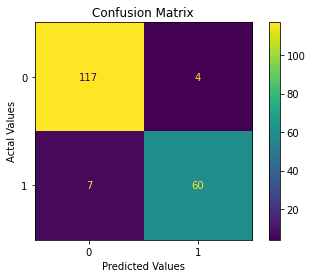

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(knn,X_test,y_test)
#sns.heatmap(cm_df, annot=True,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### What is Imbalance data ? 

- We say data is imbalance, 
    - when the number of samples for particular class is more than the number of samples of the other classes.

Lets understand this with a Business Case study of Churn Prediction which we already covered in Logistic Regression.

Note: In the Logistic Regression lecture, the Churn Data we used was processed such that we removed the Imbalance present in the data 

Recapping the Problem Statement:
- The dataset is in telecom domain, that contains some Customer features such as {last month bill, usage , Account Length} 
- and we want to predict if the customer will churn or not 

#### what does churn mean?
- Lets take an example, 
- supposedly we are a customer of Airtel 
- and for some reason we have switched to another telecom company,
- Then we have churned as a customer 

#### Why even predict customer churn or not ?
- The Telecom company, after predicting those customers who will churn
- can reach out to them and provide offers such that they do not churn



#### Question: If we think of the dataset, how many Churn data samples will be there in the data ?
- Only a handful, hence the Churn data samples <<< the data samples of not Non Churn,
- hence making the data imbalanced. 

Now lets load the dataset:

In [ ]:
import pandas as pd
import numpy as np
from numpy import argmax

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score , f1_score, plot_confusion_matrix,classification_report

In [ ]:
!gdown 1rQPzACKn3SANJwBuJe_Wzk-B0sEGDRrW

Downloading...
From: https://drive.google.com/uc?id=1rQPzACKn3SANJwBuJe_Wzk-B0sEGDRrW
To: /content/Churn.csv
100% 289k/289k [00:00<00:00, 70.0MB/s]


In [ ]:
churn = pd.read_csv("Churn.csv")
churn.head()


Account Length  VMail Message  Day Mins  Eve Mins  Night Mins  Intl Mins  \
0             128             25     265.1     197.4       244.7       10.0   
1             107             26     161.6     195.5       254.4       13.7   
2             137              0     243.4     121.2       162.6       12.2   
3              84              0     299.4      61.9       196.9        6.6   
4              75              0     166.7     148.3       186.9       10.1   

   CustServ Calls  Churn  Intl Plan  VMail Plan  ...  Day Charge  Eve Calls  \
0               1      0          0           1  ...       45.07         99   
1               1      0          0           1  ...       27.47        103   
2               0      0          0           0  ...       41.38        110   
3               2      0          1           0  ...       50.90         88   
4               3      0          1           0  ...       28.34        122   

   Eve Charge  Night Calls  Night Charge  Intl Calls  Intl Charge  State  \
0       16.78           91         11.01           3         2.70     KS   
1       16.62          103         11.45           3         3.70     OH   
2       10.30          104          7.32           5         3.29     NJ   
3        5.26           89          8.86           7         1.78     OH   
4       12.61          121          8.41           3         2.73     OK   

  Area Code     Phone  
0       415  382-4657  
1       415  371-7191  
2       415  358-1921  
3       408  375-9999  
4       415  330-6626  

[5 rows x 21 columns]

In [ ]:
churn.shape

(3333, 21)

Lets also check if there are any duplicates in the dataset

In [ ]:
if churn.shape[0] == churn.drop_duplicates().shape[0] :
    print('No duplicates Found')
else:
    duplicates = churn.shape[0] - churn.drop_duplicates().shape[0]
    print('{} duplicates found'.format(duplicates))

No duplicates Found


Checking for NULL values

In [ ]:
churn.isna().sum()

Account Length    0
VMail Message     0
Day Mins          0
Eve Mins          0
Night Mins        0
Intl Mins         0
CustServ Calls    0
Churn             0
Intl Plan         0
VMail Plan        0
Day Calls         0
Day Charge        0
Eve Calls         0
Eve Charge        0
Night Calls       0
Night Charge      0
Intl Calls        0
Intl Charge       0
State             0
Area Code         0
Phone             0
dtype: int64

- Notice how there is no null values in the dataset 

Recall how we used only a few features from the dataset which might not be the best ones to choose. 

- Considering the same 

In [ ]:
cols = ['Day Mins', 'Eve Mins', 'CustServ Calls', 'Intl Plan','VMail Message']
y = churn["Churn"]
X = churn[cols]
X.shape

(3333, 5)

Lets do a Count of samples for each Class labels

In [ ]:
churn["Churn"].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

- Notice how we have a few samples of Churn Data samples, and more samples of Not Churn Data samples


Spliting data in Train, Validation and test set

In [ ]:
# Train, CV, test split
from sklearn.model_selection import train_test_split
#0.6, 0.2, 0.2 split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

In [ ]:
X_train.head()

Day Mins  Eve Mins  CustServ Calls  Intl Plan  VMail Message
1399     167.6     219.2               4          0              0
360      257.1     312.2               1          1              0
1136     270.3     215.2               1          1             26
2078     131.1     176.2               1          0              0
2011     194.2     193.8               3          0              0

### Imbalance data with kNN



- We have seen how outliers can affect the KNN model.


# **Can KNN get affected by Imbalanced data ?** 

Lets take an example:
- Supposedly we have a lot of +ve class labels datapoints as compared to -ve class labels data points
- We know, The value of K ranges from 1 to number of total datapoints in the data (n) 

#### Now if k = 7, what will KNN model predict for $x_q$ ?
- We see irrespective of where the $x_q$ will be, KNN will always predict $x_q$ as a +ve class label
- Since the majority of K nearest neighbors will be +ve class labels 











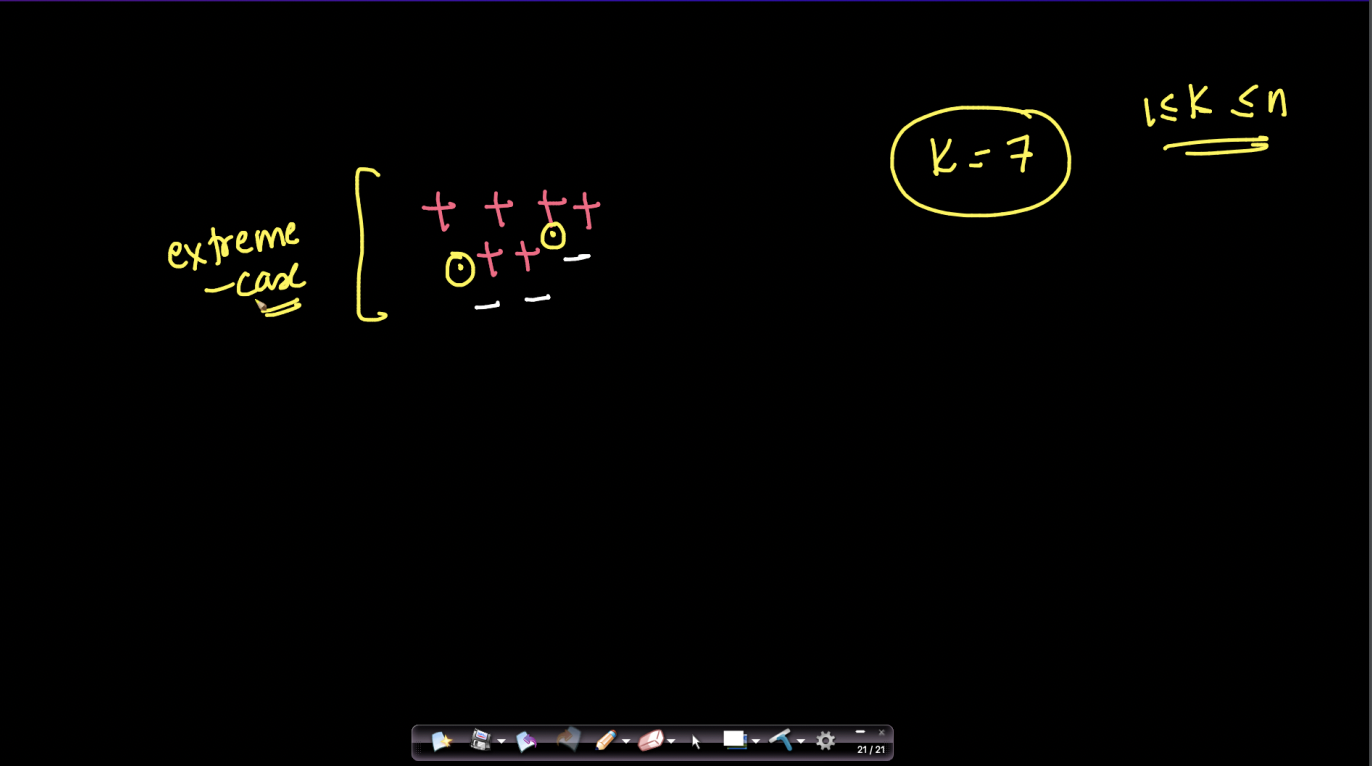

this shows that,
**when value of K is very large or close to number of datapoints(n)**,
- Data imbalance effects KNN model predictions

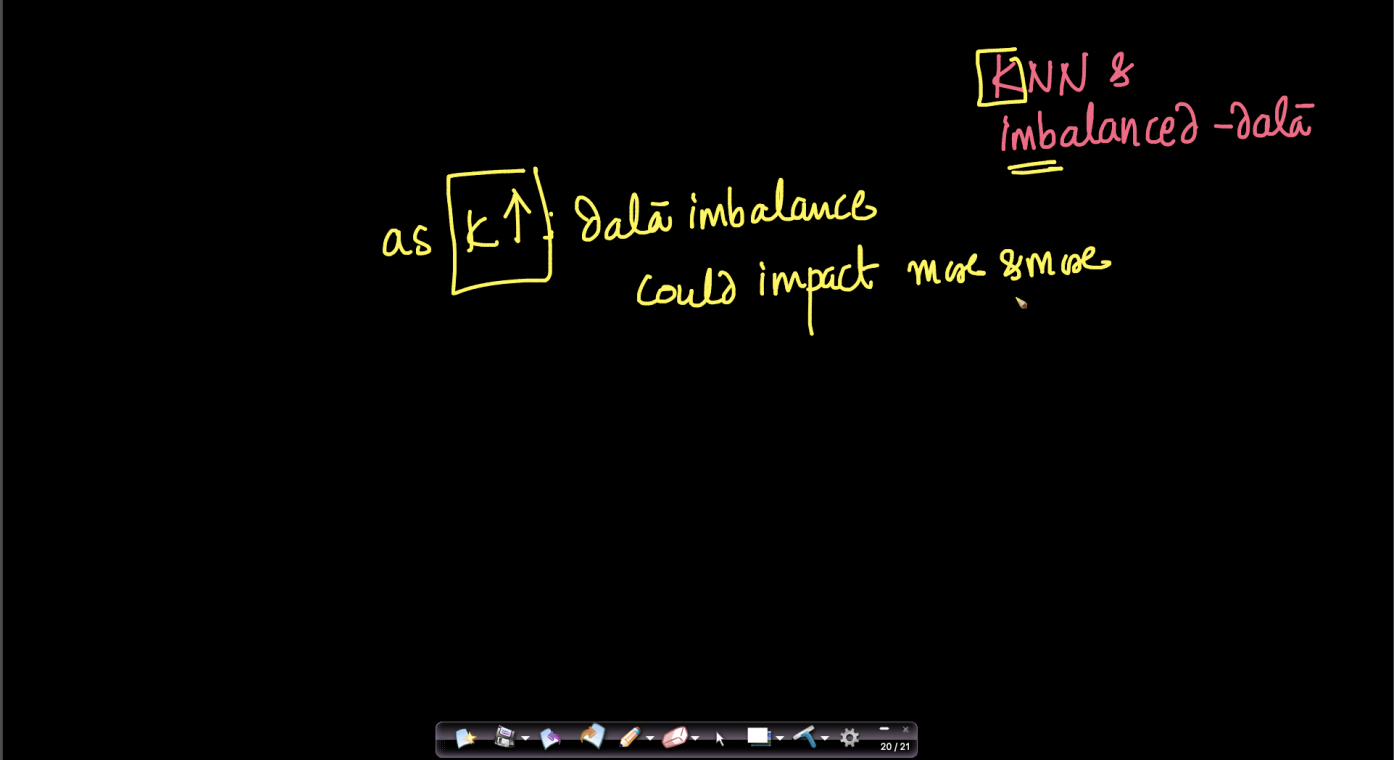

## **What if K<<n, will imbalance data impact KNN model predictions ?**

Lets take an example
- We again take a dataset where datapoints of +ve labels more than datapoints of -ve labels but we set K = 3, 
- now when we predict for $x_q$ (highlighted in pink dot), we see how the KNN will be predicting the class label as -ve
- even though we have a lot of +ve class label datapoints

hence when k << n , then imbalance impacts KNN much less 






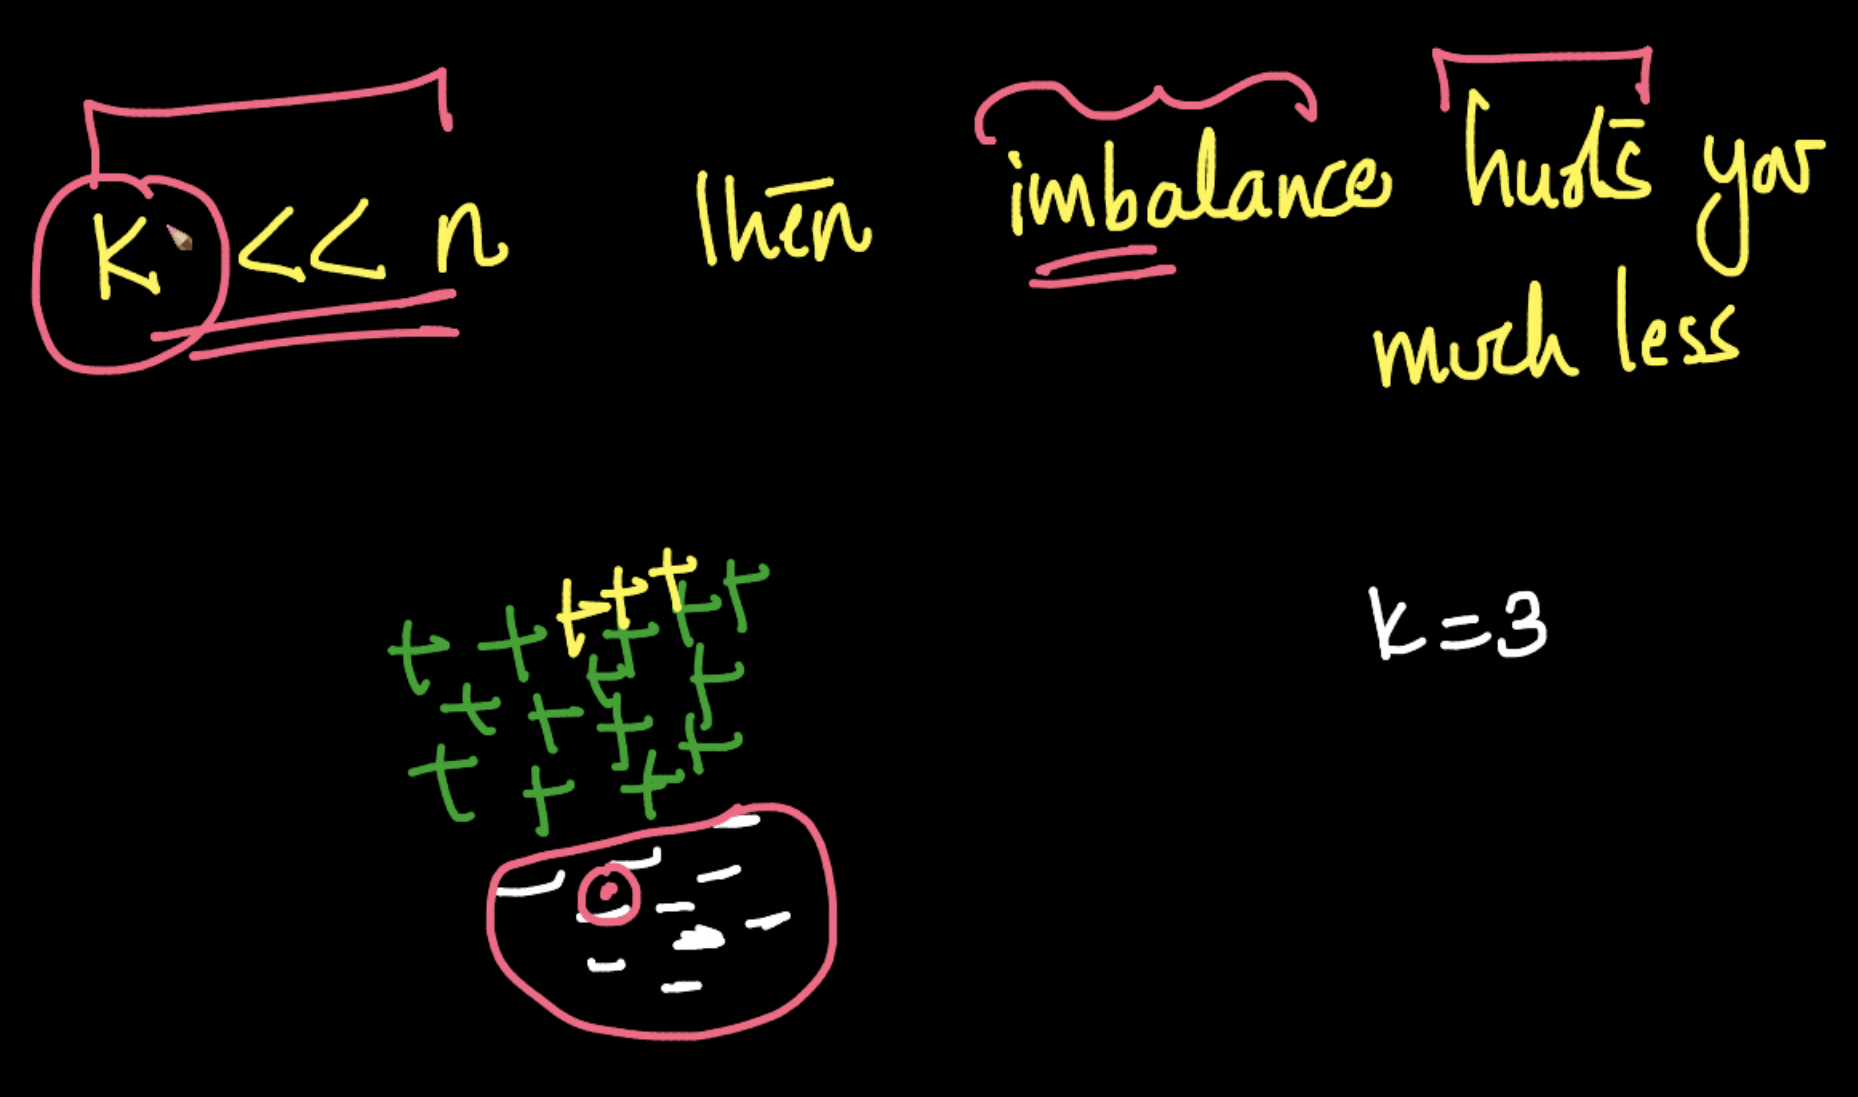

#### Lets check how KNN on our imbalanced Churn prediction Dataset 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Calculating  $K_{best}$
- with k values ranging: $1 \le k \le 50$

Note: Error defined as 1-accuracy

In [ ]:
error = []

# Calculating error for K values between 1 and 50
# Note: 51 is not included in the loop 
for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    error.append(np.mean(pred_i != y_val))

In [ ]:
len(error)

50

Visualizing the error and K values

Text(0, 0.5, 'Mean Error')

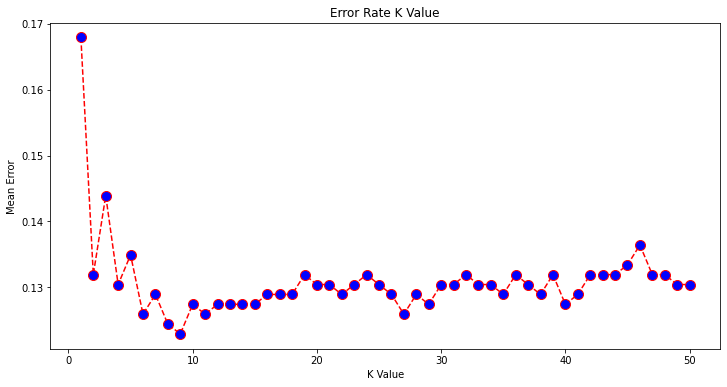

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 51), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

- Noticing that the first K value where Mean error is lowest is at K = 9,
- Hence $K_{best} = 9$

Note: The finding of $K_{best}$ was done on Validation Data

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9,metric='euclidean')

knn.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=9)

Accuracy of KNN on Test data

In [ ]:
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.9025487256371814

#### Question: Will Accuracy be the best metric to measure model performance in Imbalance Dataset ?

Recall from Classification Metrics, when we have imbalance data
- We do not use Accuracy as peformance metric 

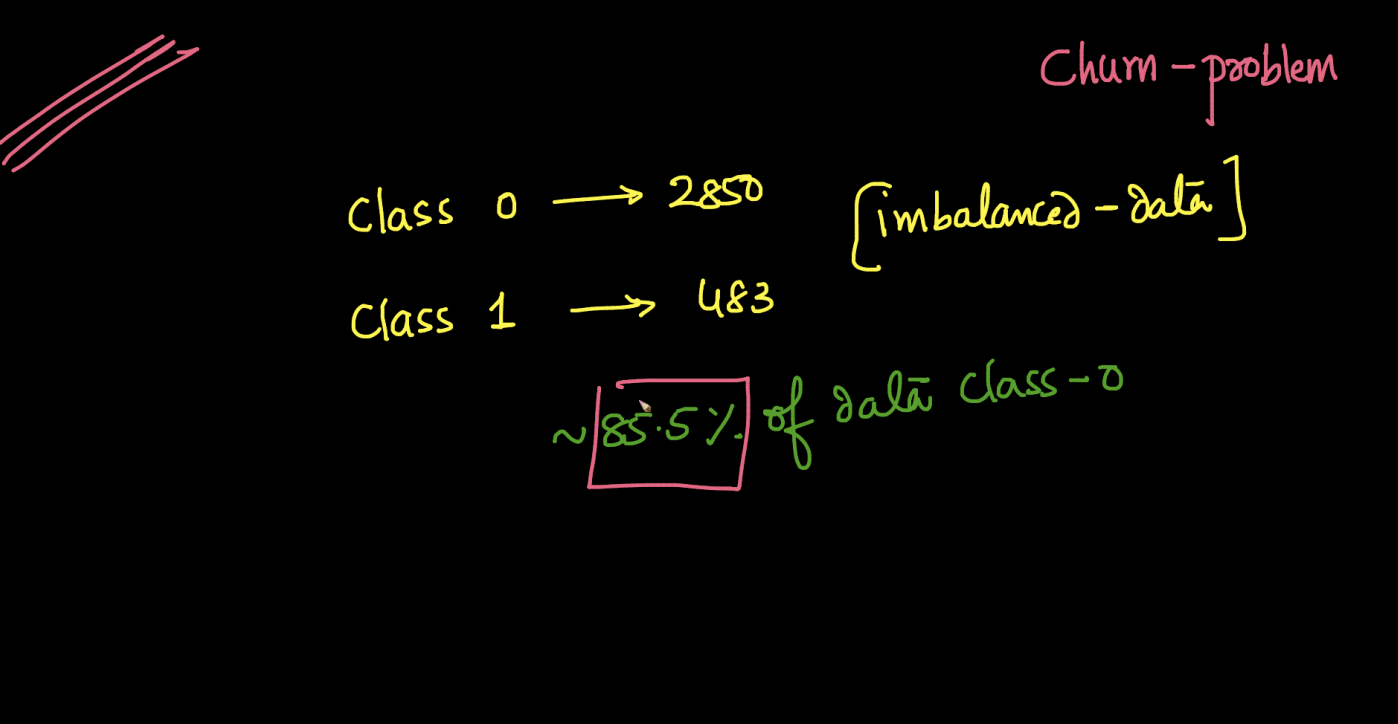

#### if 85.5% of the data is $y_i = 0$, so a model which predicts $y =0$ for all the 100% of data what will be its Accuracy ?
- Since the model will hit the correct predictions 85.5% of the time, the Accuracy will be 85.5% 
- Even though the model is terrible


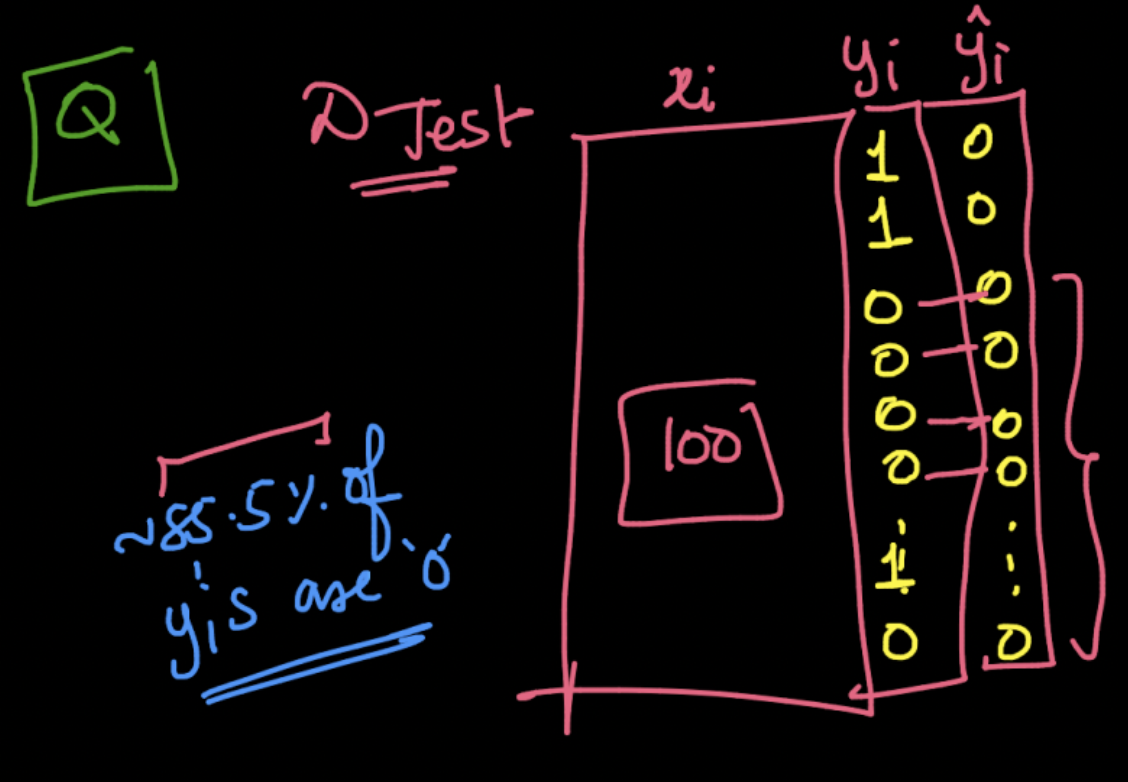


Hence using Confusion matrix, Precision, Recall, F1-Score on test data 

Confusion Matrix of KNN on Test Data

In [ ]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,index = np.unique(y_test), columns = np.unique(y_test) )

cm_df.head()

0   1
0  560   6
1   59  42

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x576 with 0 Axes>

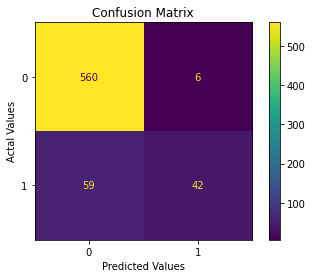

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(knn,X_test,y_test)
#sns.heatmap(cm_df, annot=True,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Using F1-Score as metric 

In [ ]:
f1_score(y_test,y_pred)

0.5637583892617449

Note : We can see KNN is impacted by Imbalance in Churn Dataset but not to a large extent

#### Sometimes, the $y_î$ is in the form of probabilities only. What metric should we use in this case ?
- Brier score is just the average of Squared Error 
- Defined as $Brier-score = \frac{1}{n}∑_{i=1}^{i=n}(y_{i}-y_î)^2 $
    


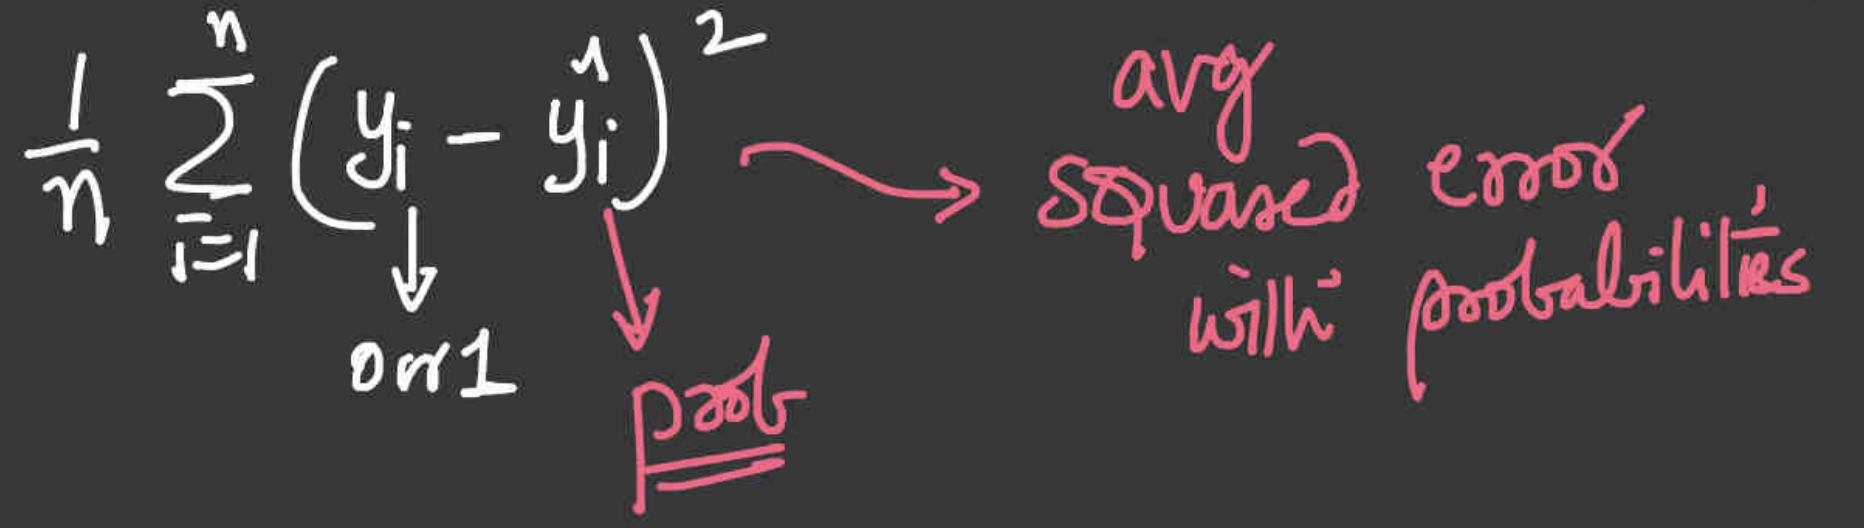

#### What if we want to compare model's performance on majority and minority class ?

- We use a metric called G-mean   

- The Geometric Mean (G-Mean) is a metric measures the balance between classification performances on both the majority and minority classes. 

- A low G-Mean is an indication of a poor performance in the classification of the positive cases even if the negative cases are correctly classified as such.

 - $G-mean = \sqrt{Specificity*Sensitivity} $

Lets Implement G-Mean

In [ ]:
tp = float(cm_df[1][1])
tn = float(cm_df[0][0])
fp = float(cm_df[0][1])
fn = float(cm_df[1][0])

spec = tn/(tn+fp)

sens = tp/(tp+fn)

g_mean = (spec*sens)**(0.5)

print(f"G-mean: {g_mean}")

G-mean: 0.8897186936309959


- notice how KNN gets a G-Mean of 88.97% which shows KNN is  effected much less by Imbalance in the data

Recall from Performance Metrics:
- F1-measure balances the precision and recall.
- Precision is a metric that quantifies the number of correct positive predictions made.
  - $Precision = \frac{TruePositives}{TruePositives + FalsePositives}$

- Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made.

 - $Recall = \frac{TruePositives}{TruePositives + FalseNegatives} $



But On some problems, we might be interested in an F-measure with more attention put on precision, such as when false positives are more important to minimize.

.

The solution is the Fbeta-measure.
- Defined as Fbeta = $\frac{((1 + beta^2) * Precision * Recall)} {(beta^2 * Precision + Recall)}$


When it is more important to optimise recall than precision
- we use the F2 score
- Defined as: $F2 = \frac{(1+2^2)*precision*recall}{(2^2)*precision+recall}$
      


Lets Implement these Metrics 


In [ ]:
from sklearn.metrics import fbeta_score

print(classification_report(y_test, knn.predict(X_test)))

y_pred = knn.predict(X_test)

f2 = fbeta_score(y_test,y_pred,beta=2)

print(f"F2: {f2}")


              precision    recall  f1-score   support

           0       0.90      0.99      0.95       566
           1       0.88      0.42      0.56       101

    accuracy                           0.90       667
   macro avg       0.89      0.70      0.75       667
weighted avg       0.90      0.90      0.89       667

F2: 0.46460176991150437


Notice how the F2 metrics is low, indicating the imbalance data impacts the KNN such that there are more False Negative 

####Now what if we might be interested in an F-measure with more attention put on precisiom, such as when false positive are more important to minimize how do we do that ?
- We use the F0.5 score
- $F0.5 = \frac{(1+0.5^2)*precision*recall}{(0.5^2)precision+recall}$


In [ ]:
f0 = fbeta_score(y_test,y_pred,beta=0.5)

print(f"F0.5: {f0}")

F0.5: 0.7167235494880546


With this we know, for Imbalanced Binary Classification, we need to rely on different Metrics,
- Each serving their own Importance

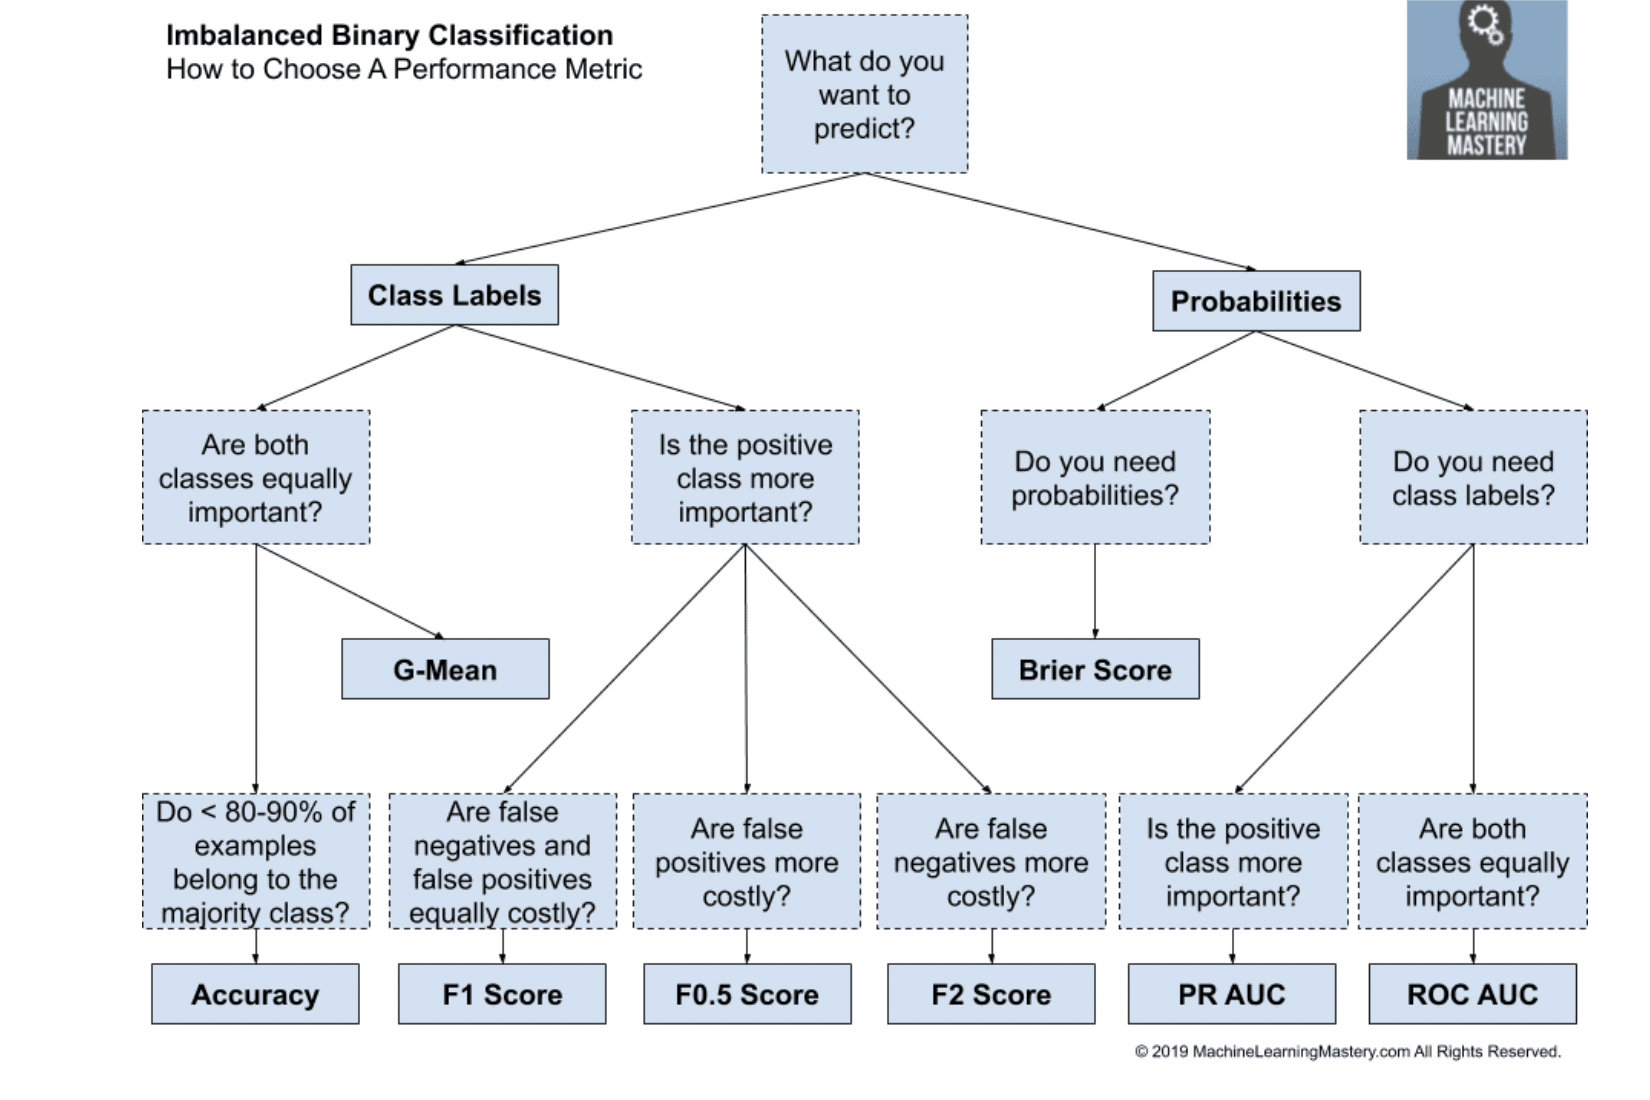

# **Imbalance Data with Logistic Regression**



For Churn Prediction lets say, 

- in our training data, we have 850 non churn (0) samples and 150 churn (1) samples.

- Now if there is a hyperplane Π that separates the dataset,

- Recall, how in logistic regression, we minimize the loss function which was the summation of log-loss over the entire data sample (n).
 - Loss = $∑_{i=1}^{i=n} logloss_i$

#### But since -ve class samples much greater than +ve class samples, What will be the effect on the loss function?
- The -ve class sampled data dominates the loss functions
- This makes the hyperplane Π to be pushed away from the -ve class data points
- Since the -ve class labels will want to be as further away from the hyperplane as possible.
- thus the model favors -ve class label points and ignores the +ve class label

Notice, how Imbalance data also effects Logistic Regression model, 

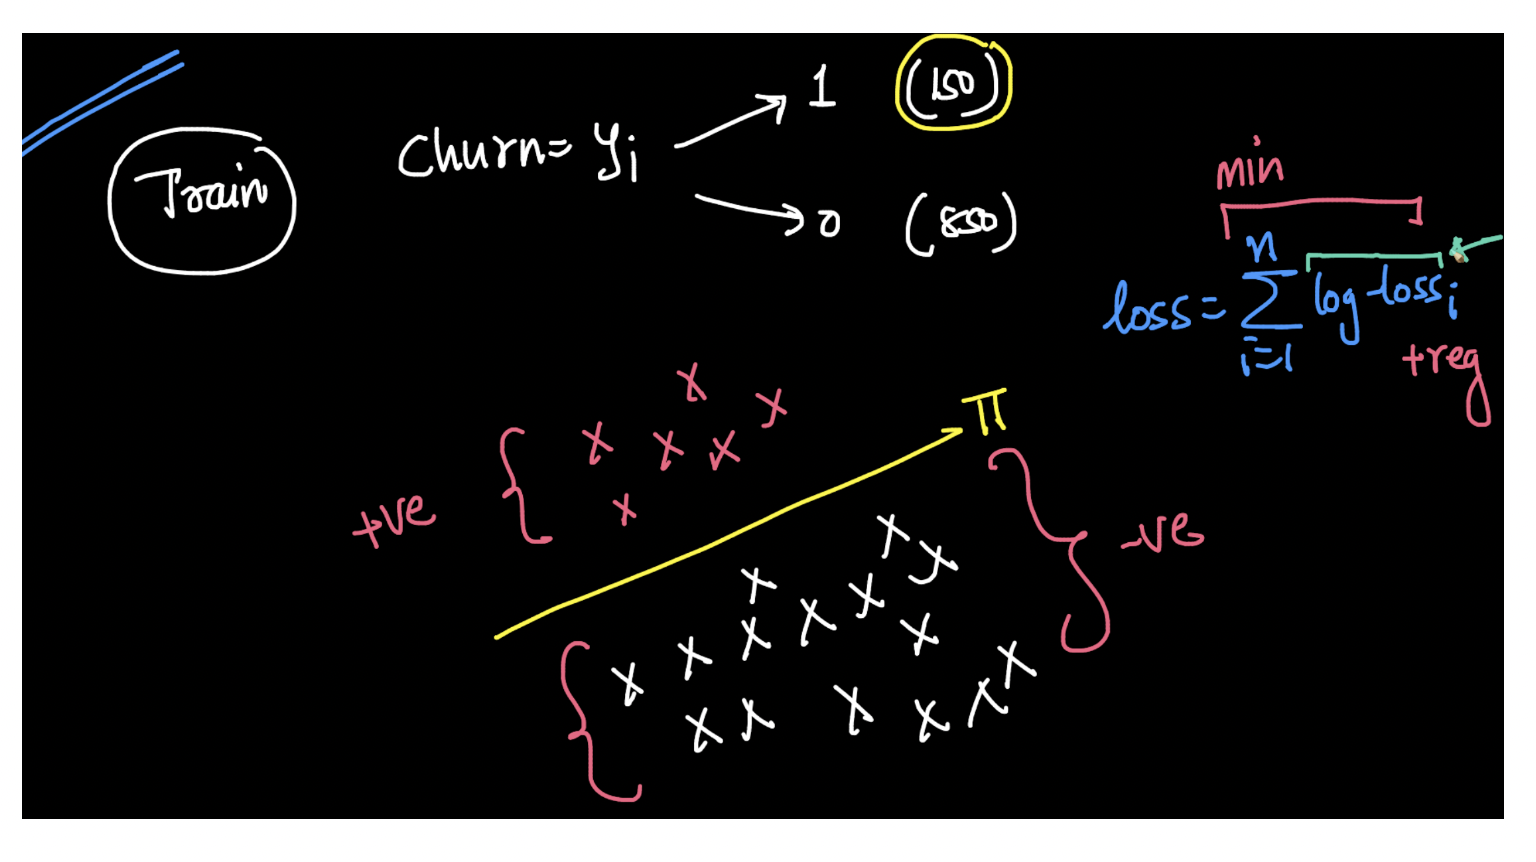


Lets now see how its implemented in SKlearn for Logisitic Regression
- Since we cannot use Accuracy, We will be using F1-Score as metric for comparing the best Regularization Parameter (λ).

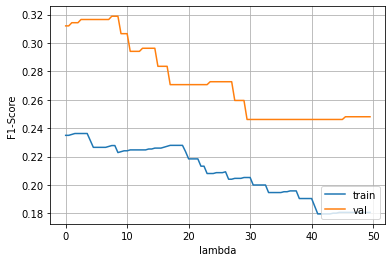

In [ ]:
# Hyper-pram tuning without any rebalancing 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score

train_scores = []
val_scores = []
scaler = StandardScaler()
l = 0.01
h = 50.0
d = 0.5

for la in np.arange(l,h,d):
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_train, y_train)
  train_y_pred = scaled_lr.predict(X_train)
  val_y_pred = scaled_lr.predict(X_val)
  train_score = f1_score(y_train, train_y_pred)
  val_score = f1_score(y_val, val_y_pred)
  train_scores.append(train_score)
  val_scores.append(val_score)

plt.figure()
plt.plot(list(np.arange(l,h,d)), train_scores, label="train")
plt.plot(list(np.arange(l,h,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

**Observe** 

how the model has performed poorly without the weighted log-loss 
- As the best F1-Score for validation is only 32%

<br>

This shows that we need to handle the Imbalance data

# **Handling Imbalance Data**


## **Weighted Loss**
#### Now that we know, imbalance data impacts model performance whether it being KNN or Logistic Regression, is there a way to handle imbalance data ?

We notice how Imbalance data causes issues on the loss function.



### **Can we manupilate the loss function such that it incooporates Imbalance data case too ?**
-  We can a class-weight to the log-loss function which will be a constant
 - loss = $∑_{i=1}^{i=1000}logloss_i .w_i$

#### how to calculate this class-weight ?
- we see , we have 850 -ve class samples and 150 +ve class samples.
- Hence $w_i$ can be defined as the ratio of class with more number of samples to the class with less number of samoples $ w_i = \frac{850}{150} ≈ 6 $  

- Since +ve class has less samples, we say $w_i = 6$
- And for -ve class, we say $w_i = 1$ 



Note: this approach is done on the model parameters.


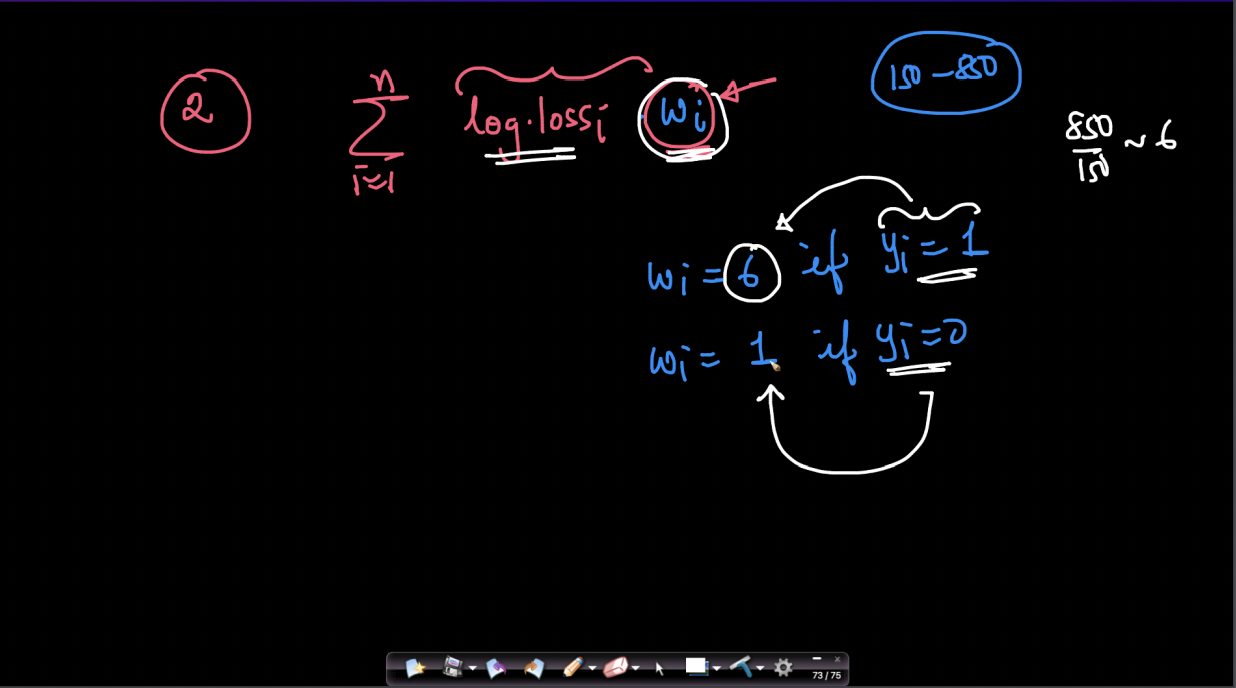

#### Implementation of Churn Prediction using weighted loss


Lets now see how its implemented in SKlearn for Logisitic Regression
- Since we cannot use Accuracy, We will be using F1-Score as metric for comparing the best Regularization Parameter (λ).

we will be adding class weights to each of the class labels
- For Not Churn $y_i = 0$, 
    - $w_0 = 1 $  
- For Churn $y_i = 1$,    
    - $w_1 = \frac{2850}{483} = 5.9 ≈ 6 $  

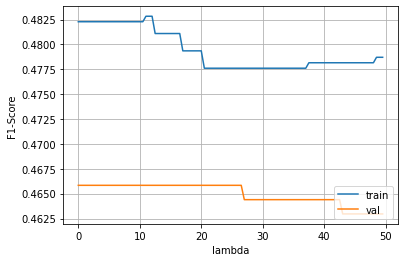

In [ ]:
# minority class needs more re-weighting 

# Hyper-pram tuning
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score

train_scores = []
val_scores = []
scaler = StandardScaler()
l = 0.01
h = 50.0
d = 0.5

for la in np.arange(l,h,d):
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la, class_weight={ 0:1, 1:6 }))
  scaled_lr.fit(X_train, y_train)
  train_y_pred = scaled_lr.predict(X_train)
  val_y_pred = scaled_lr.predict(X_val)
  train_score = f1_score(y_train, train_y_pred)
  val_score = f1_score(y_val, val_y_pred)
  train_scores.append(train_score)
  val_scores.append(val_score)

#plotting
plt.figure()
plt.plot(list(np.arange(l,h,d)), train_scores, label="train")
plt.plot(list(np.arange(l,h,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

In [ ]:
best_idx = np.argmax(val_scores)
print(val_scores[best_idx])

0.46583850931677023


**Observe**

how introducing Weighted-loss, 
- increased the F1-score

<br>


Using the best  Regularization parameter and the class-weight, 
- we see the performance of the model on test data


In [ ]:
# Model with lambda_best
best_idx = np.argmax(val_scores)
l_best = l+d*best_idx
scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/l_best, class_weight={ 0:1, 1:6 }))
scaled_lr.fit(X_train, y_train)

y_pred_test = scaled_lr.predict(X_test)
test_score = f1_score(y_test, y_pred_test)

print(test_score)


0.5098039215686274


Let's look at this confusion matrix for the data.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

conf_mat = confusion_matrix(y_test, scaled_lr.predict(X_test))
print(conf_mat)

[[439 127]
 [ 23  78]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x576 with 0 Axes>

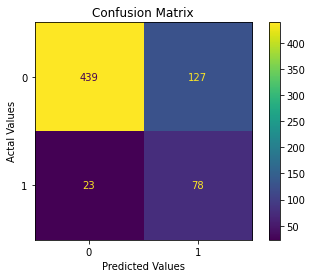

In [ ]:

#Plotting the confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(scaled_lr,X_test,y_test)
#sns.heatmap(cm_df, annot=True,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

- Notice, how after weighted log-loss, the model is quite good in classifying most of the data correctly

Lets look into the other metrics as well

In [ ]:



from sklearn.metrics import fbeta_score

tp = float(conf_mat[1][1])
tn = float(conf_mat[0][0])
fp = float(conf_mat[0][1])
fn = float(conf_mat[1][0])


print(classification_report(y_test, scaled_lr.predict(X_test)))

y_pred = scaled_lr.predict(X_test)


f2 = fbeta_score(y_test,y_pred,beta=2)
f0 = fbeta_score(y_test,y_pred,beta=0.5)

spec = tn/(tn+fp)
sens = tp/(tp+fn)

g_mean = (spec*sens)**(0.5)

print(f"G-mean: {g_mean}")
print(f"F2: {f2}")
print(f"F0.5: {f0}")



              precision    recall  f1-score   support

           0       0.95      0.78      0.85       566
           1       0.38      0.77      0.51       101

    accuracy                           0.78       667
   macro avg       0.67      0.77      0.68       667
weighted avg       0.86      0.78      0.80       667

G-mean: 0.773945998164426
F2: 0.6403940886699506
F0.5: 0.4234527687296417


# **Oversampling**



#### Now what if we only wanted to change on the data, to make it balanced ?

- The first approach is , if we replicating the samples of the +ve labels such that it becomes almost same as the -ve labels.

- Now if we Replicate the 150 samples 6 times, we get 900 samples for +ve class label.

- This makes our total number of samples (n) as 850+900  = 1750

hence our loss function becomes 
- loss = $∑_{i=1}^{i=1750}log-loss_i $ 


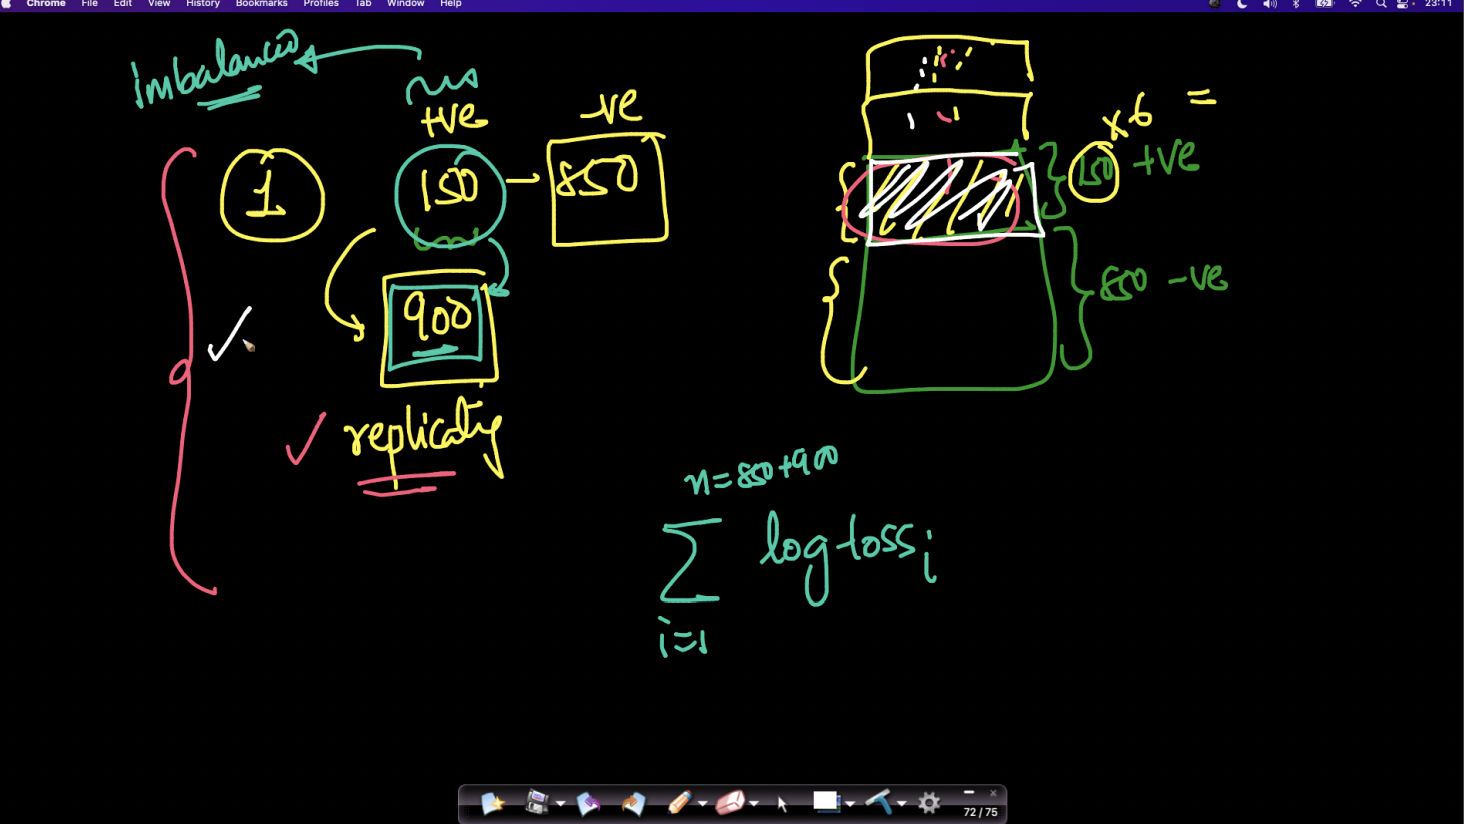

# **Undersampling**

- The other approach is to remove datapoints/samples of the -ve class label (since more in number)
- such that Datapoints of -ve class label is equal to the datapoints of +ve class label.

#### But does reducing the data cause data information loss ?
- Yes, with such information loss, it reduces the model reliability

- Hence we do Undersampling, only when the number of datapoints/samples(n) are really large( apporx. 1 billion)



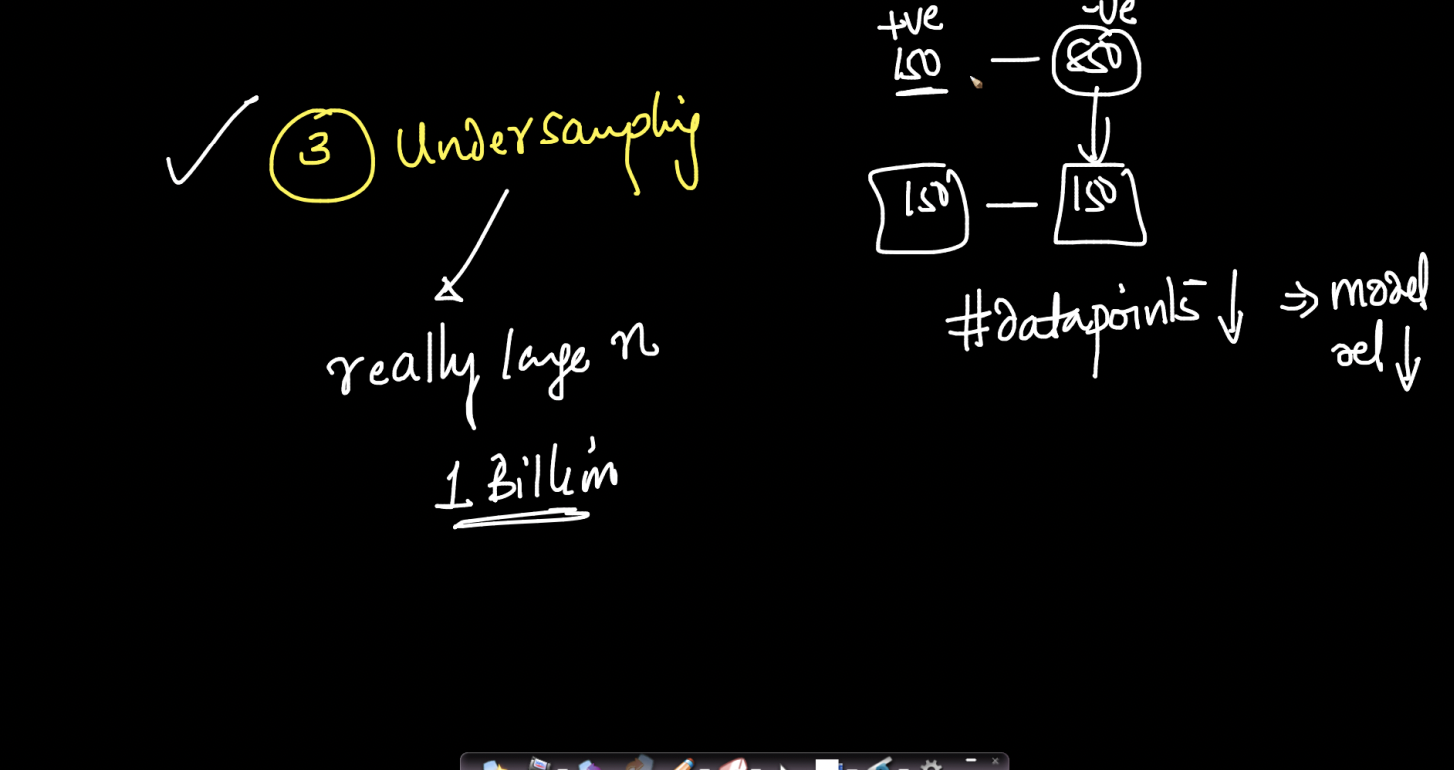

# **SMOTE (Synthetically Minority Oversampling Technique)**


- Notice how in oversampling data we were just repeating the data

#### Can we a bit more smart about the oversampling approach and use something like K Nearest Neighbors based approach?

Lets assume we have an imbalanced dataset having a large number of +ve labels samples and a few number of -ve labels samples
- Lets take k = 3, and we take a random point $x_1$  on the -ve class label.
    - now for i which varies from 1 to k
    - we compute the distance ($d_{1,2}$) between $x_1$ and the 1st nearest neighbor $x_2$ using the different distance metrics 
    - Now we select a random value between [0,1], lets assume we select 0.2 
    - with these values, we create a new datapoint $x_{new} = x_1 + 0.2 d_{1,2}$
    - Now we will add this $x_{new}$ to the dataset with class label as -ve
    - We repeat this, for the other Nearest Neighbors   


#### how is SMOTE better than oversampling ?
- In oversampling, we are simply repeating the data
- But now we are synthetically creating new data



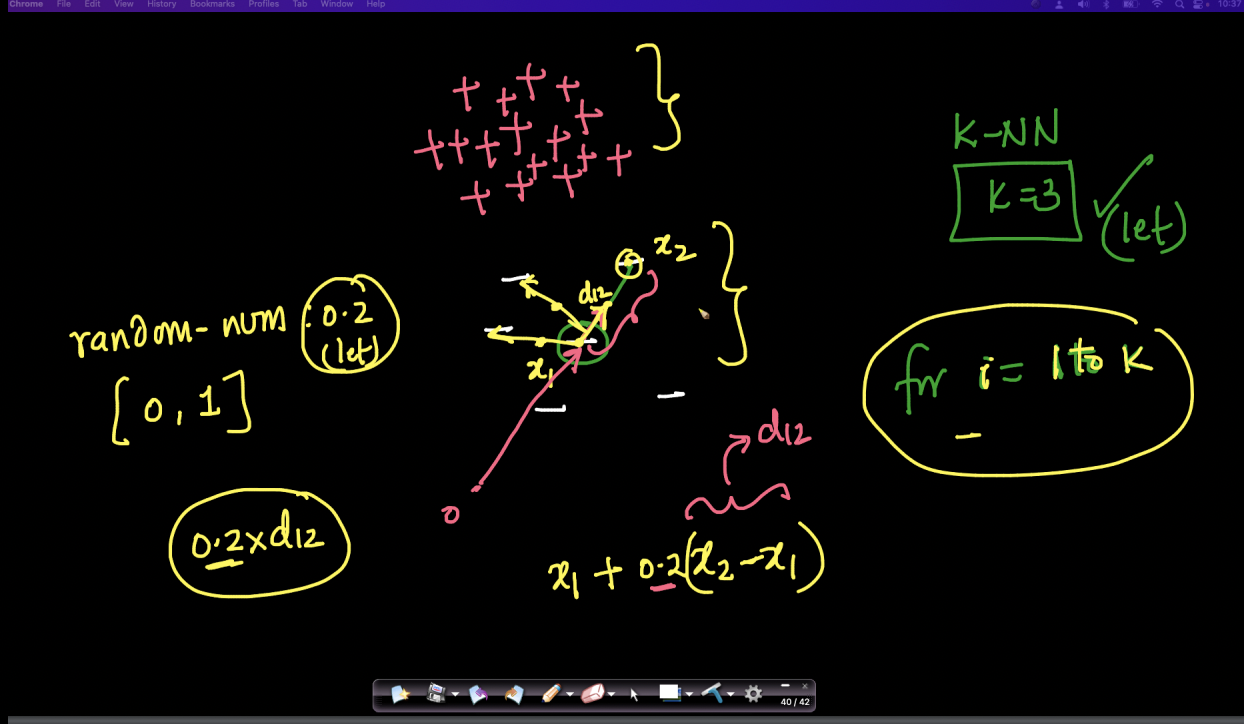

- So in short, if we have three datapoints $x_1,x_2,x_3$ with all -ve class labels,
- SMOTE uses K nearest neighbors approach to add a new synthetic  nearest neighbor datapoint between the original datapoints.here look how, 
    - SMOTE adds $x_{new}^1$ between $x_1$ and $x_2$ 
    - While $x_{new}^2$ between $x_3$ and $x_1$  

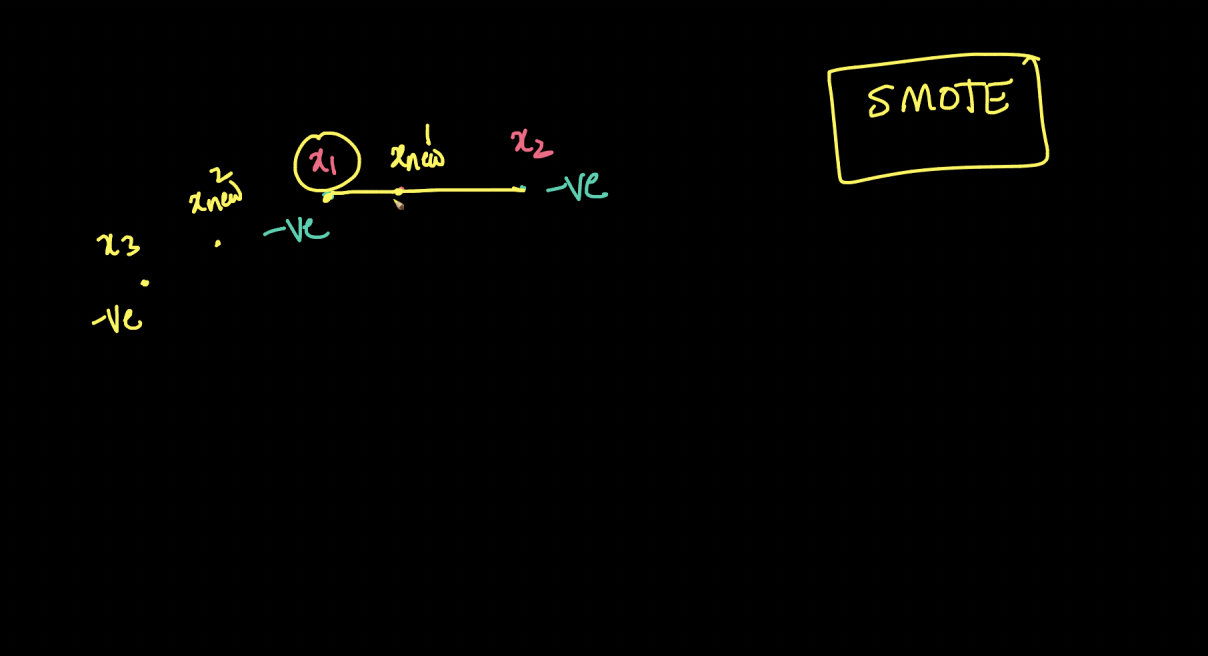

### Implementation of Churn Prediction using [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, y_train)

print('Resampled dataset shape {}'.format(Counter(y_sm)))

Resampled dataset shape Counter({0: 1718, 1: 1718})


- Notice how the data has been resampled using synthetic data, such that
 - Churn samples $y=1$ are now same as the Not Churn $y=0$ Samples 



In [ ]:
X_sm.shape,y_sm.shape

((3436, 5), (3436,))

**Observe**

The shape of X_sm is just 1718 × 2 
- showing how SMOTE oversampled the minority class 

starting with the implementation of Logistic Regression




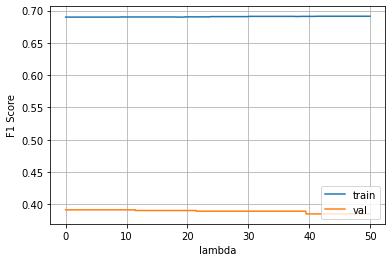

In [ ]:
# Hyper-pram tuning without any rebalancing 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


train_scores = []
val_scores = []
scaler = StandardScaler()
l = 0.01
h = 50.0
d = 0.05

for la in np.arange(l,h,d):
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_sm, y_sm)
  train_score = f1_score(y_sm, scaled_lr.predict(X_sm))
  val_score = f1_score(y_val, scaled_lr.predict(X_val))
  train_scores.append(train_score)
  val_scores.append(val_score)

plt.figure()
plt.plot(list(np.arange(l,h,d)), train_scores, label="train")
plt.plot(list(np.arange(l,h,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("F1 Score")
plt.grid()
plt.show()

- From this we now find the best Regularization Parameter for Logistic Regression

In [ ]:
best_idx = np.argmax(val_scores)
print(val_scores[best_idx])

0.39153439153439157


Using the best Logistic Model for Test data

And predicting the test accuracy

In [ ]:
# Model with lambda_best
best_idx = np.argmax(val_scores)
l_best = l+d*best_idx
scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/l_best))
scaled_lr.fit(X_sm, y_sm)

y_pred_test = scaled_lr.predict(X_test)
test_score = f1_score(y_test, y_pred_test)

print(test_score)


0.44021739130434784


### Notice how Logistic Regression model F1-score is pretty bad on the test data, Why is that ?

lets have a check on the other metrics as well:

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


conf_mat = confusion_matrix(y_test, scaled_lr.predict(X_test))
print(conf_mat)

[[380 186]
 [ 20  81]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x576 with 0 Axes>

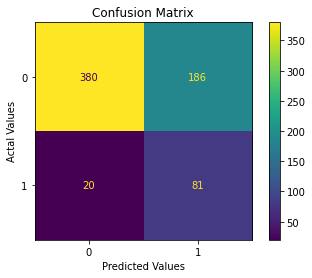

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(scaled_lr,X_test,y_test)
#sns.heatmap(cm_df, annot=True,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

**Observe**
 
using SMOTE 
- the False Positive and False Negative increased 

This means for Logisitic Regression
- Showing how Class weight works much better for Logistic Regression 

In [ ]:
tp = float(conf_mat[1][1])
tn = float(conf_mat[0][0])
fp = float(conf_mat[0][1])
fn = float(conf_mat[1][0])


print(classification_report(y_test, scaled_lr.predict(X_test)))

y_pred = scaled_lr.predict(X_test)

f2 = fbeta_score(y_test,y_pred,beta=2)
f0 = fbeta_score(y_test,y_pred,beta=0.5)

spec = tn/(tn+fp)
sens = tp/(tp+fn)

g_mean = (spec*sens)**(0.5)

print(f"G-mean: {g_mean}")
print(f"F2: {f2}")
print(f"F0.5: {f0}")



              precision    recall  f1-score   support

           0       0.95      0.68      0.80       566
           1       0.31      0.80      0.45       101

    accuracy                           0.70       667
   macro avg       0.63      0.74      0.62       667
weighted avg       0.85      0.70      0.74       667

G-mean: 0.7405068656539772
F2: 0.6099397590361446
F0.5: 0.3549517966695881


- Notice how all the other metrics shows the same 
- That using the Weighted logloss than SMOTE makes Logistic Regression model perform much better

- Now lets look how SMOTE Oversampling works for KNN 

#### KNN

Finding the best K

In [ ]:
error = []

# Calculating error for K values between 1 and 50
# Note: 51 is not included in the loop 
for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(X_sm, y_sm)
    pred_i = knn.predict(X_val)
    error.append(np.mean(pred_i != y_val))

Text(0, 0.5, 'Mean Error')

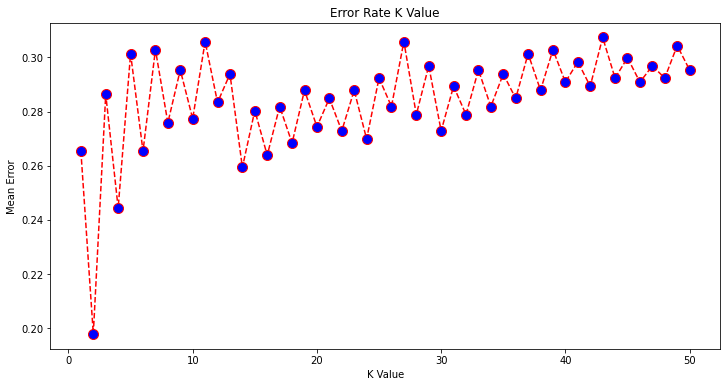

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 51), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

- Notice how the the best K value is when $K_{best}$=2

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2,metric='euclidean')

knn.fit(X_sm, y_sm)


KNeighborsClassifier(metric='euclidean', n_neighbors=2)

Finding F1-Score of the model 

In [ ]:
y_pred = knn.predict(X_test)
f1_score(y_test,y_pred)

0.44976076555023925

KNN is also performing poorly, 

Lets see the Confusion Matrix on better evaluating the model

In [ ]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,index = np.unique(y_test), columns = np.unique(y_test) )

cm_df.head()

0   1
0  505  61
1   54  47

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x576 with 0 Axes>

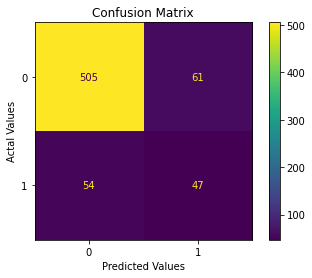

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(knn,X_test,y_test)
#sns.heatmap(cm_df, annot=True,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

- notice how SMOTE Increased the False Negative and False Positive of KNN

In [ ]:
tp = float(cm_df[1][1])
tn = float(cm_df[0][0])
fp = float(cm_df[0][1])
fn = float(cm_df[1][0])


print(classification_report(y_test, knn.predict(X_test)))

y_pred = knn.predict(X_test)

f2 = fbeta_score(y_test,y_pred,beta=2)
f0 = fbeta_score(y_test,y_pred,beta=0.5)

spec = tn/(tn+fp)
sens = tp/(tp+fn)

g_mean = (spec*sens)**(0.5)

print(f"G-mean: {g_mean}")
print(f"F2: {f2}")
print(f"F0.5: {f0}")


              precision    recall  f1-score   support

           0       0.92      0.87      0.89       566
           1       0.44      0.56      0.49       101

    accuracy                           0.82       667
   macro avg       0.68      0.72      0.69       667
weighted avg       0.84      0.82      0.83       667

G-mean: 0.6319779656173647
F2: 0.5327102803738317
F0.5: 0.45599999999999996


- This shows that using Weighted loss and different metrics we can evaluate the model much better, 
- and SMOTE is not the only correct way to tackle imbalanced data